In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.grid'] = True
                                  
                                  
from dsp import simplify_biquad_filters
import dsp

In [2]:
filt = signal.iirfilter(6, 100, btype='low',
                       analog=False, rs=60, rp=0.01,
                        ftype='ellip', fs=1000,output='sos')
c = simplify_biquad_filters(filt)

In [3]:
w = np.arange(0, np.pi, 0.1)

In [52]:
H0 = c[-1]

J = len(c) // 4 # num stages
group_delay = 0
for i in range(0, J*4, 4):
    
    a0, a1, b0, b1 = c[i:i+4]
    
    alpha_n = 1 - a0**2 + a1*(1 - a0) * np.cos(w)
    beta_n = a0**2 + a1**2 + 1 + 2*a0*1*(2*np.cos(w)**2 - 1) + 2*a1*(a0 + 1)*np.cos(w)
    alpha_d = 1 - b0**2 + b1*(1 - b0)*np.cos(w)
    beta_d =  b0**2 + b1**2 + 1 + 2*b0*1*(2*np.cos(w)**2 - 1) + 2*b1*(b0 + 1)*np.cos(w)

    group_delay += -alpha_n/beta_n + alpha_d/beta_d

group_delay

    

array([ 4.97805926,  5.05933728,  5.29153028,  5.69555039,  6.42182269,
        7.72704007, 10.57205743, 18.53834765,  9.07069522,  4.60710163,
        3.01667754,  2.21471383,  1.73296316,  1.41397369,  1.18917499,
        1.0236987 ,  0.89791442,  0.79993852,  0.72217197,  0.65954256,
        0.60854634,  0.56669419,  0.53217738,  0.50365742,  0.48012979,
        0.46083321,  0.44518781,  0.43275239,  0.4231945 ,  0.41626947,
        0.41180585,  0.40969572])

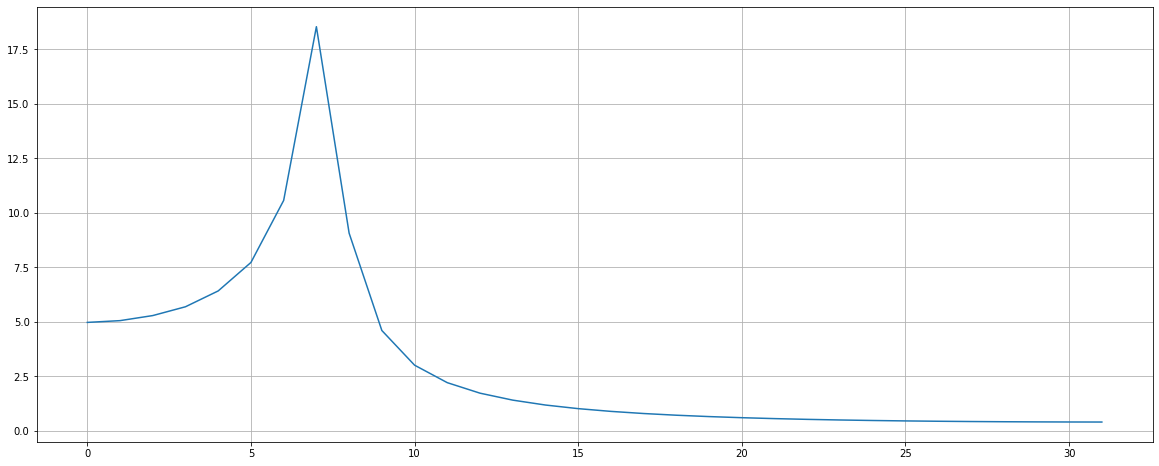

In [53]:
plt.plot(group_delay)

In [54]:
def group_delay(c, w):
    """
    Calculates the group delay for filter with coefficients c for the given frequencies in w
    
    parameters
    ----------
    
    c: ndarray
        list of all coefficients of all seconds order stages:
        [a_01 a_11 b_01 b_11 ... b_0N b_1N H0]

    w: ndarray
        frequency bins in the range [0, π] to evaluate the group delay on

    """
    
    J = len(c) // 4 # num stages: we don't use H0 = c[-1]
    group_delay = 0
    for i in range(0, J*4, 4):

        a0, a1, b0, b1 = c[i:i+4]

        alpha_n = 1 - a0**2 + a1*(1 - a0) * np.cos(w)
        beta_n = a0**2 + a1**2 + 1 + 2*a0*1*(2*np.cos(w)**2 - 1) + 2*a1*(a0 + 1)*np.cos(w)
        alpha_d = 1 - b0**2 + b1*(1 - b0)*np.cos(w)
        beta_d =  b0**2 + b1**2 + 1 + 2*b0*1*(2*np.cos(w)**2 - 1) + 2*b1*(b0 + 1)*np.cos(w)

        group_delay += -alpha_n/beta_n + alpha_d/beta_d

    return group_delay

In [51]:
group_delay(c, w)

array([ 4.97805926,  5.05933728,  5.29153028,  5.69555039,  6.42182269,
        7.72704007, 10.57205743, 18.53834765,  9.07069522,  4.60710163,
        3.01667754,  2.21471383,  1.73296316,  1.41397369,  1.18917499,
        1.0236987 ,  0.89791442,  0.79993852,  0.72217197,  0.65954256,
        0.60854634,  0.56669419,  0.53217738,  0.50365742,  0.48012979,
        0.46083321,  0.44518781,  0.43275239,  0.4231945 ,  0.41626947,
        0.41180585,  0.40969572])

In [8]:
dsp.group_delay(c, w)

array([3.39051947, 3.38086765, 3.31226017, 3.11385356, 2.77490841,
       2.36354763, 1.96137687, 1.61436095, 1.33352039, 1.11242372,
       0.93965638, 0.80426004, 0.69731624, 0.61201376, 0.54327568,
       0.48734148, 0.4414185 , 0.40341845, 0.37176587, 0.34526081,
       0.32298083, 0.30421061, 0.28839135, 0.27508378, 0.26394126,
       0.25468979, 0.24711327, 0.24104245, 0.2363468 , 0.23292844,
       0.23071786, 0.22967085])

In [55]:
def group_delay_deviation(x, w):
    """
    Calculates the group delay for filter with coefficients c for the given frequencies in w
    
    parameters
    ----------
    
    x: ndarray
        list of all coefficients of all seconds order stages and tau, the group delay optimization variable:
        [c tau]

    w: ndarray
        frequency bins in the range [0, π] to evaluate the group delay on

    """
    
    J = (len(x) - 2) // 4 # num stages: we don't use H0 = c[-1]
    tau = x[-1]
    group_delay = 0
    for i in range(0, J*4, 4):

        a0, a1, b0, b1 = x[i:i+4]

        alpha_n = 1 - a0**2 + a1*(1 - a0) * np.cos(w)
        beta_n = a0**2 + a1**2 + 1 + 2*a0*1*(2*np.cos(w)**2 - 1) + 2*a1*(a0 + 1)*np.cos(w)
        alpha_d = 1 - b0**2 + b1*(1 - b0)*np.cos(w)
        beta_d =  b0**2 + b1**2 + 1 + 2*b0*1*(2*np.cos(w)**2 - 1) + 2*b1*(b0 + 1)*np.cos(w)

        group_delay += -alpha_n/beta_n + alpha_d/beta_d

    return group_delay - tau

In [56]:
group_delay_deviation(np.r_[c, 1], w)

array([ 3.97805926,  4.05933728,  4.29153028,  4.69555039,  5.42182269,
        6.72704007,  9.57205743, 17.53834765,  8.07069522,  3.60710163,
        2.01667754,  1.21471383,  0.73296316,  0.41397369,  0.18917499,
        0.0236987 , -0.10208558, -0.20006148, -0.27782803, -0.34045744,
       -0.39145366, -0.43330581, -0.46782262, -0.49634258, -0.51987021,
       -0.53916679, -0.55481219, -0.56724761, -0.5768055 , -0.58373053,
       -0.58819415, -0.59030428])

# Group delay optimization cost function

We want to minimize the group delay deviation 

In [11]:
import gradients

In [23]:
gd = gradients._group_delay(c, w)
tau = np.mean(gd)
x = np.r_[c, tau]
grad_eg = gradients.group_delay_deviation_gradient(x, w)

In [25]:
gd.shape

(32,)

In [14]:
grad_eg.shape

(32, 14)

In [19]:
print(grad_eg)

[[ 3.0751354e-01  0.0000000e+00 -2.4751348e+01 -1.9113882e+01
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0000000e+00]
 [ 3.0881688e-01  0.0000000e+00 -2.1076681e+01 -1.6965374e+01
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0000000e+00]
 [ 3.1277573e-01  0.0000000e+00 -1.1294748e+01 -1.0946825e+01
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0000000e+00]
 [ 3.1953999e-01  0.0000000e+00  2.8756142e-01 -3.1503191e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0000000e+00]
 [ 3.2937402e-01  0.0000000e+00  8.2813873e+00  3.0706568e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00


In [20]:
d = np.ones(14)
d # should be the update vector for the coefficients in x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
objfun = np.matmul(grad_eg, d) + gd

In [48]:
# L2 norm
np.linalg.norm(objfun, ord=2)

296.13525

In [47]:
# L1 norm
np.linalg.norm(objfun, ord=1)

670.0366

In [46]:
# infinity norm
np.linalg.norm(objfun, ord=np.inf)

224.27393